In [ ]:
import numpy as np
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
RunFolder = "28Jan2019"
FV_count = 2048

In [ ]:
print("FV len :" + str(FV_count))
print("Folder :" + RunFolder )

In [ ]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [ ]:
Class = 8

In [28]:
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Fixation_WeightedSum_Combined_Csv/TR_CombinedFixation_FeatureVector.csv", header=None)
X = dataframe.values
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/TR_Label.csv", header=None)
Ytemp = dataframe.values
Y = Ytemp[:,0]
#X.shape


In [29]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
y_train_one_hot = tf.keras.utils.to_categorical(Y, Class)

In [30]:
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values
# load dataset
dataframe = pandas.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Test_Label.csv", header=None)
Y_testtemp = dataframe.values
Y_test = Y_testtemp[:,0]
X_test.shape


(72, 2048)

In [31]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Ytest = encoder.transform(Y)
y_test_one_hot = tf.keras.utils.to_categorical(Y_test, Class)

In [32]:
#plt.hist(np.mean(X, axis=1))

In [39]:
from keras import regularizers
########## HYPER PARAMETERS
batch_size = 128 #128
epochs = 300
optimizer = tf.keras.optimizers.Adam()
########## HYPER PARAMETERS

########## MODEL ARCHITECTURE
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(80, activation='selu', input_shape=(2048,))) #92 relu
model.add(tf.keras.layers.Dropout(0.30)) #.2
model.add(tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l1(0.4), bias_regularizer=regularizers.l1(0.35))) #48
model.add(tf.keras.layers.Dropout(0.3)) #.2
#model.add(tf.keras.layers.Dense(16, activation='relu'))#WAS removed 
model.add(tf.keras.layers.Dense(Class, activation='softmax'))
########## MODEL ARCHITECTURE

# Print summary
model.summary()

# compile model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_one_hot))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 80)                163920    
_________________________________________________________________
dropout_25 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_26 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 328       
Total params: 167,488
Trainable params: 167,488
Non-trainable params: 0
_________________________________________________________________
Train on 240 samples, validate on 72 samples
Epoch 1/300
240/240 [==============================]240/240 [==============================


Epoch 41/300
240/240 [==============================]240/240 [==============================] - 0s 119us/step - loss: 62.2158 - acc: 0.3000 - val_loss: 61.0359 - val_acc: 0.2917

Epoch 42/300
240/240 [==============================]240/240 [==============================] - 0s 118us/step - loss: 60.7129 - acc: 0.2792 - val_loss: 59.4425 - val_acc: 0.3194

Epoch 43/300
240/240 [==============================]240/240 [==============================] - 0s 119us/step - loss: 59.0688 - acc: 0.2917 - val_loss: 57.8694 - val_acc: 0.1944

Epoch 44/300
240/240 [==============================]240/240 [==============================] - 0s 151us/step - loss: 57.5473 - acc: 0.2458 - val_loss: 56.3293 - val_acc: 0.3056

Epoch 45/300
240/240 [==============================]240/240 [==============================] - 0s 193us/step - loss: 56.0094 - acc: 0.2500 - val_loss: 54.7875 - val_acc: 0.2639

Epoch 46/300
240/240 [==============================]240/240 [==============================] - 0s 362us

240/240 [==============================]240/240 [==============================] - 0s 247us/step - loss: 11.6649 - acc: 0.3875 - val_loss: 11.2835 - val_acc: 0.3194

Epoch 87/300
240/240 [==============================]240/240 [==============================] - 0s 368us/step - loss: 11.0422 - acc: 0.3750 - val_loss: 10.6844 - val_acc: 0.3056

Epoch 88/300
240/240 [==============================]240/240 [==============================] - 0s 229us/step - loss: 10.4232 - acc: 0.3833 - val_loss: 10.0956 - val_acc: 0.2917

Epoch 89/300
240/240 [==============================]240/240 [==============================] - 0s 270us/step - loss: 9.8163 - acc: 0.4250 - val_loss: 9.5434 - val_acc: 0.3333

Epoch 90/300
240/240 [==============================]240/240 [==============================] - 0s 245us/step - loss: 9.3148 - acc: 0.3833 - val_loss: 9.0000 - val_acc: 0.3472

Epoch 91/300
240/240 [==============================]240/240 [==============================] - 0s 314us/step - loss: 8.77

240/240 [==============================]240/240 [==============================] - 0s 226us/step - loss: 2.2387 - acc: 0.2833 - val_loss: 2.2832 - val_acc: 0.3611

Epoch 133/300
240/240 [==============================]240/240 [==============================] - 0s 203us/step - loss: 2.2385 - acc: 0.3375 - val_loss: 2.2846 - val_acc: 0.3472

Epoch 134/300
240/240 [==============================]240/240 [==============================] - 0s 226us/step - loss: 2.2544 - acc: 0.2792 - val_loss: 2.2803 - val_acc: 0.3472

Epoch 135/300
240/240 [==============================]240/240 [==============================] - 0s 224us/step - loss: 2.2246 - acc: 0.3167 - val_loss: 2.2823 - val_acc: 0.3472

Epoch 136/300
240/240 [==============================]240/240 [==============================] - 0s 234us/step - loss: 2.2328 - acc: 0.3542 - val_loss: 2.2790 - val_acc: 0.3472

Epoch 137/300
240/240 [==============================]240/240 [==============================] - 0s 247us/step - loss: 2.232

240/240 [==============================]240/240 [==============================] - 0s 125us/step - loss: 2.1646 - acc: 0.3500 - val_loss: 2.2392 - val_acc: 0.3611

Epoch 179/300
240/240 [==============================]240/240 [==============================] - 0s 126us/step - loss: 2.1698 - acc: 0.3167 - val_loss: 2.2375 - val_acc: 0.3472

Epoch 180/300
240/240 [==============================]240/240 [==============================] - 0s 123us/step - loss: 2.1573 - acc: 0.3708 - val_loss: 2.2410 - val_acc: 0.3750

Epoch 181/300
240/240 [==============================]240/240 [==============================] - 0s 123us/step - loss: 2.1884 - acc: 0.3042 - val_loss: 2.2393 - val_acc: 0.3611

Epoch 182/300
240/240 [==============================]240/240 [==============================] - 0s 120us/step - loss: 2.1665 - acc: 0.3417 - val_loss: 2.2333 - val_acc: 0.3472

Epoch 183/300
240/240 [==============================]240/240 [==============================] - 0s 120us/step - loss: 2.173

240/240 [==============================]240/240 [==============================] - 0s 121us/step - loss: 2.0964 - acc: 0.3792 - val_loss: 2.1890 - val_acc: 0.3194

Epoch 225/300
240/240 [==============================]240/240 [==============================] - 0s 118us/step - loss: 2.0808 - acc: 0.4000 - val_loss: 2.1901 - val_acc: 0.3889

Epoch 226/300
240/240 [==============================]240/240 [==============================] - 0s 144us/step - loss: 2.0812 - acc: 0.3458 - val_loss: 2.1908 - val_acc: 0.3056

Epoch 227/300
240/240 [==============================]240/240 [==============================] - 0s 205us/step - loss: 2.0989 - acc: 0.3792 - val_loss: 2.1891 - val_acc: 0.2917

Epoch 228/300
240/240 [==============================]240/240 [==============================] - 0s 376us/step - loss: 2.1192 - acc: 0.3542 - val_loss: 2.1884 - val_acc: 0.3333

Epoch 229/300
240/240 [==============================]240/240 [==============================] - 0s 246us/step - loss: 2.073

240/240 [==============================]240/240 [==============================] - 0s 339us/step - loss: 2.0082 - acc: 0.4333 - val_loss: 2.1455 - val_acc: 0.3472

Epoch 271/300
240/240 [==============================]240/240 [==============================] - 0s 269us/step - loss: 2.0327 - acc: 0.3750 - val_loss: 2.1462 - val_acc: 0.3889

Epoch 272/300
240/240 [==============================]240/240 [==============================] - 0s 305us/step - loss: 1.9790 - acc: 0.4375 - val_loss: 2.1469 - val_acc: 0.3611

Epoch 273/300
240/240 [==============================]240/240 [==============================] - 0s 247us/step - loss: 2.0084 - acc: 0.4125 - val_loss: 2.1433 - val_acc: 0.3750

Epoch 274/300
240/240 [==============================]240/240 [==============================] - 0s 274us/step - loss: 2.0253 - acc: 0.4000 - val_loss: 2.1450 - val_acc: 0.3472

Epoch 275/300
240/240 [==============================]240/240 [==============================] - 0s 241us/step - loss: 1.979

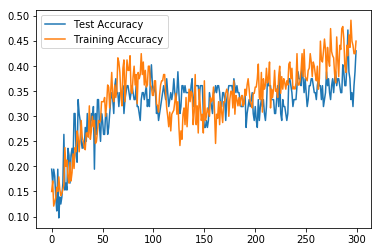

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], label="Test Error")
plt.plot(history.history['loss'], label="Train Error")
plt.legend()

In [ ]:
import datetime
now = datetime.datetime.now()
TempName = str(now.day) +str(now.month)+ str(now.hour) + str(now.minute)

# save model to JSON
model_json = model.to_json()
with open(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/" + TempName + "Predict_DNN_Resnet2048FV_8Class.json", "w") as json_file:
    json_file.write(model_json)
# save weights to HDF5
model.save_weights(FilePath + "Runs/" + RunFolder +  "/ModelsAndWeights/" + TempName + "Predict_DNN_Resnet2048FV_8Class.h5")
print("Saved model to disk")